In [15]:
baselines = {"Task001_adhesion_clf": 0.983, "Task002_nodule_clf": 0.959, "Task003_kidney_clf": 0.842,
             "Task004_skin_case_selection_clf": 0.996, "Task005_recist_timeline_clf": 0.944,
             "Task006_pathology_tumor_origin_clf": 0.631, "Task007_nodule_diameter_presence_clf": 0.870,
             "Task008_pdac_size_presence_clf": 0.640, "Task009_pdac_diagnosis_clf": 0.767, "Task010_prostate_radiology_clf": 0.975,
             "Task011_prostate_pathology_clf": 0.861, "Task012_pathology_tissue_type_clf": 0.428, "Task013_pathology_tissue_origin_clf": 0.669, "Task014_textual_entailment_clf": 0.577, "Task015_colon_pathology_clf": 0.991, "Task016_recist_lesion_size_presence_clf": 0.903, "Task017_pdac_attributes_clf": 0.639, "Task018_osteoarthritis_clf": 0.686,
             "Task019_prostate_volume_reg": 0.981, "Task020_psa_reg": 0.974, "Task021_psad_reg": 0.955, "Task022_pdac_size_reg": 0.854, "Task023_nodule_diameter_reg": 0.818,
             "Task024_recist_lesion_size_reg": 0.783}

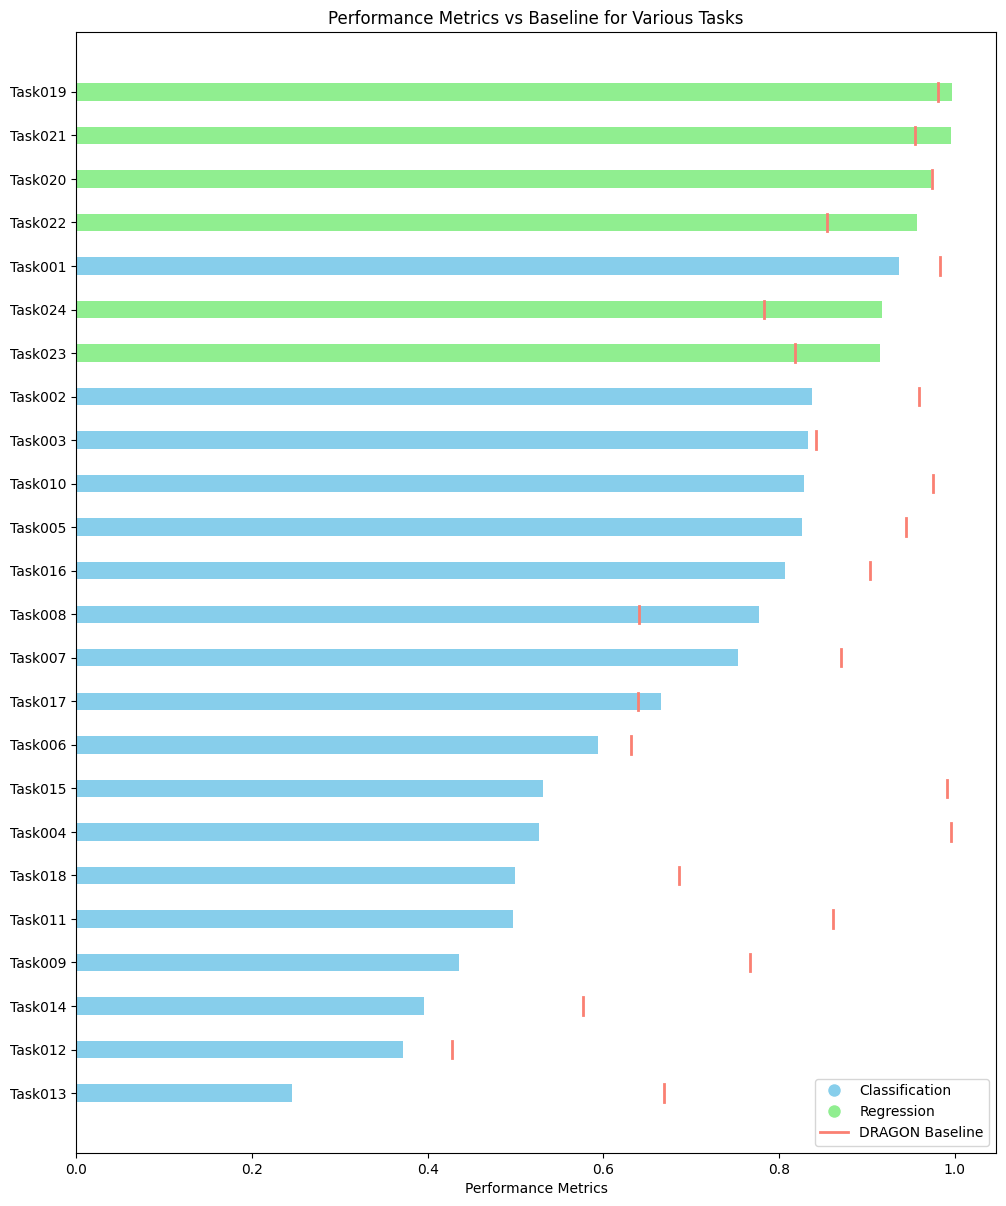

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load metrics from JSON file
metricsfile = "/data/bodyct/experiments/luc_t10162/GitHub/LLM_data_extractor/output/mistral-nemo/0_examples/metrics.json"
with open(metricsfile, 'r') as file:
    metrics_data = json.load(file)

# Extract mean performance values from the metrics JSON
performance_data = {task: details['mean'] for task, details in metrics_data['aggregates'].items() if task != 'overall'}

# Create DataFrame from metrics and baselines
df_metrics = pd.DataFrame(list(performance_data.items()), columns=['Task', 'Performance'])
df_baselines = pd.DataFrame(list(baselines.items()), columns=['Task', 'Baseline'])
df = pd.merge(df_metrics, df_baselines, on='Task')

# Simplify task labels and categorize tasks
df['TaskID'] = df['Task'].apply(lambda x: x.split('_')[0])  # Extracts 'TaskXXX'
df['Category'] = df['Task'].apply(lambda x: 'clf' if 'clf' in x else 'reg')  # Categorize as 'clf' or 'reg'

# Sort tasks by performance in descending order
df = df.sort_values(by='Performance', ascending=False).reset_index(drop=True)

# Dynamically adjust figure height based on the number of tasks
task_count = len(df['Task'])
plt.figure(figsize=(10, 0.5 * task_count))  # Set height proportional to task count

y = range(task_count)

# Color coding for clf and reg tasks
colors = {'clf': 'skyblue', 'reg': 'lightgreen'}

# Horizontal bars for actual performance
for idx, row in df.iterrows():
    plt.barh(y=idx, width=row['Performance'], height=0.4, color=colors[row['Category']], label='_nolegend_')
    # Add a small line to indicate baseline performance
    plt.plot([row['Baseline'], row['Baseline']], [idx - 0.2, idx + 0.2], color='salmon', linewidth=2)

# Reverse the y-axis to show best performance at the top
plt.gca().invert_yaxis()

# Customize plot labels and legend
plt.yticks(ticks=y, labels=df['TaskID'])
plt.xlabel("Performance Metrics")
plt.title("Performance Metrics vs Baseline for Various Tasks")

# Custom legend for categories
clf_patch = plt.Line2D([0], [0], marker='o', color='w', label='Classification', markerfacecolor='skyblue', markersize=10)
reg_patch = plt.Line2D([0], [0], marker='o', color='w', label='Regression', markerfacecolor='lightgreen', markersize=10)
baseline_patch = plt.Line2D([0], [0], color='salmon', linewidth=2, label='DRAGON Baseline')
plt.legend(handles=[clf_patch, reg_patch, baseline_patch])

# Apply tight layout with minimal padding
plt.tight_layout(pad=0.5)
plt.show()


In [53]:
import json
from pathlib import Path

task_ids = df['TaskID']
output_path = Path("/data/bodyct/experiments/luc_t10162/GitHub/LLM_data_extractor/output/mistral-nemo/0_examples/")

failed_cases_dict = {}

for task_id in task_ids:
    num_failed_cases = 0  # Move initialization here
    total_cases = 0
    try:
        task_folders = list(output_path.glob(f"{task_id}_*"))

        for task_folder in task_folders:
            filepath = task_folder / "nlp-predictions-dataset.json"
            
            try:
                with open(filepath, 'r') as file:
                    data = json.load(file)
                    
                    # Count cases where 'status' is not 'success'
                    failed_cases = sum(1 for case in data if case['status'] != 'success')
                    print(f"Task {task_id}: {failed_cases} failed cases out of {len(data)}")
                    num_failed_cases += failed_cases
                    total_cases += len(data)
            
            except Exception as e:
                print(f"Error in {task_folder}: {e}")
                continue  # Skip to the next folder if there is an error

        failed_cases_dict[task_id] = num_failed_cases  # Save after all folders checked
        failed_cases_dict[f"{task_id}_total"] = total_cases
        percentage_failed = num_failed_cases / total_cases * 100
        failed_cases_dict[f"{task_id}_percentage"] = percentage_failed

    except Exception as e:
        print(f"Task {task_id} failed to load: {e}")
        continue  # Skip to the next task_id if the task folder fails entirely

print(failed_cases_dict)


Task Task019: 0 failed cases out of 1541
Task Task019: 0 failed cases out of 1541
Task Task019: 0 failed cases out of 1541
Task Task019: 0 failed cases out of 1541
Task Task019: 0 failed cases out of 1541
Task Task021: 0 failed cases out of 1410
Task Task021: 0 failed cases out of 1410
Task Task021: 0 failed cases out of 1410
Task Task021: 1 failed cases out of 1410
Task Task021: 1 failed cases out of 1410
Task Task020: 2 failed cases out of 1428
Task Task020: 5 failed cases out of 1428
Task Task020: 3 failed cases out of 1428
Task Task020: 4 failed cases out of 1428
Task Task020: 3 failed cases out of 1428
Task Task022: 1 failed cases out of 103
Task Task022: 0 failed cases out of 103
Task Task022: 1 failed cases out of 103
Task Task022: 0 failed cases out of 103
Task Task022: 0 failed cases out of 103
Task Task001: 0 failed cases out of 119
Task Task001: 0 failed cases out of 119
Task Task001: 0 failed cases out of 119
Task Task001: 0 failed cases out of 119
Task Task001: 0 failed ca

In [52]:
# Sort each task based on the number of failed cases percentage of all cases and print
failed_cases_df = pd.DataFrame(list(failed_cases_dict.items()), columns=['Task', 'Failed Cases'])
failed_cases_df['TaskID'] = failed_cases_df['Task'].apply(lambda x: x.split('_')[0])  # Extracts 'TaskXXX'
failed_cases_df = failed_cases_df.sort_values(by='Failed Cases', ascending=False).reset_index(drop=True)
failed_cases_df['Failed Cases Percentage'] = failed_cases_df['Failed Cases'] / failed_cases_df['Failed Cases_total'] * 100
print(failed_cases_df)

KeyError: 'Failed Cases_total'

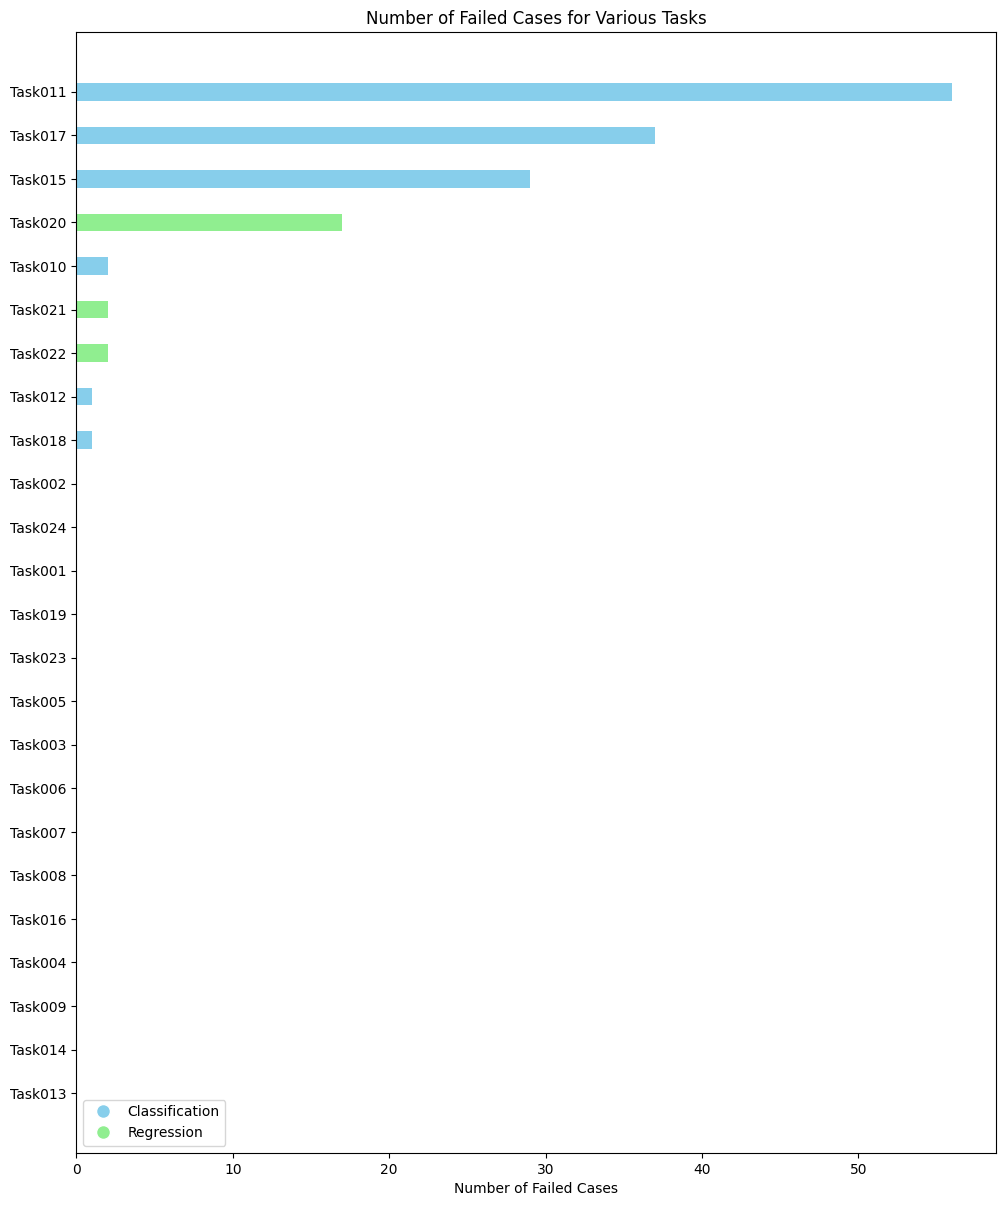

In [50]:
# Sort the DataFrame by the number of failed cases in descending order
df_sorted = df.copy()  # Make a copy to avoid changing the original DataFrame
df_sorted['FailedCases'] = df_sorted['TaskID'].map(failed_cases_dict)  # Map failed cases to a new column
df_sorted = df_sorted.sort_values(by='FailedCases', ascending=False).reset_index(drop=True)

# Update the plotting code to use the sorted DataFrame
plt.figure(figsize=(10, 0.5 * len(df_sorted)))  # Adjust height based on the sorted DataFrame

y = range(len(df_sorted))

# Horizontal bars for actual performance
for idx, row in df_sorted.iterrows():
    plt.barh(y=idx, width=failed_cases_dict[row['TaskID']], height=0.4, color=colors[row['Category']], label='_nolegend_')
    
# Reverse the y-axis to show best performance at the top
plt.gca().invert_yaxis()

# Customize plot labels and legend
plt.yticks(ticks=y, labels=df_sorted['TaskID'])
plt.xlabel("Number of Failed Cases")
plt.title("Number of Failed Cases for Various Tasks")

# Custom legend for categories
clf_patch = plt.Line2D([0], [0], marker='o', color='w', label='Classification', markerfacecolor='skyblue', markersize=10)
reg_patch = plt.Line2D([0], [0], marker='o', color='w', label='Regression', markerfacecolor='lightgreen', markersize=10)
plt.legend(handles=[clf_patch, reg_patch])

# Apply tight layout with minimal padding
plt.tight_layout(pad=0.5)
plt.show()
